In [22]:
from SALib.sample import saltelli
from tqdm.auto import tqdm
import numpy as np
import pickle
import time
import lzma
import sys
import os

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({"font.size" : 15,
                     "figure.dpi" : 100, 
                     "grid.alpha" : 0.3, 
                     "axes.grid": True, 
                     "axes.axisbelow" : True,
                     "figure.figsize":(8,6),
                     "mathtext.fontset":"cm",
                     "xtick.labelsize": 14,
                     "ytick.labelsize": 14,
                     "axes.labelsize": 16, 
                     "legend.fontsize": 13.5})

plt.rc("text", usetex=False)
plt.rc("font", family="serif")

In [2]:
def GINI(x):
    mad = np.abs(np.subtract.outer(x, x)).mean()
    mean = np.mean(x) or 1
    rmad = mad/mean
    g = 0.5 * rmad
    return g

In [3]:
# problem definition
PROBLEM = {
    "num_vars" : 5,
    "names"    : ["theta",
                  "gain_right",
                  "saving_prop",
                  "prob_left",
                  "alpha"],
    "bounds"   : [[0.05, 0.95],
                  [1.70, 8.00],
                  [0.70, 0.80],
                  [0.30, 0.45],
                  [2.00, 12.0]]
}

# generate Saltelli samples
NUM_SAMPLES = 1024
X = saltelli.sample(PROBLEM, NUM_SAMPLES, calc_second_order=False)

<ipython-input-3-1647d18ac9f5>:18: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  X = saltelli.sample(PROBLEM, NUM_SAMPLES, calc_second_order=False)


In [4]:
os.chdir("../")
import cpt_optimisation

In [9]:
folders = [x for x in os.listdir("DATA/nodebt/") if "DS_" not in x]
folders = sorted(folders, key=lambda x: int(x.split("_")[-1]))
num_agents = 1225

In [10]:
agent_comm_degrees = {}
FINAL_W = np.zeros((20, 7168, 1225), dtype=np.float16)
regime = np.zeros((20, 7168))

start_t = time.time()

for seed_folder in folders:

    print(f"{time.time()-start_t:.2f} | {seed_folder}")
    seed = int(seed_folder.split("_")[-1])
    
    if seed not in agent_comm_degrees:
        agent_comm_degrees[seed] = {}
        
    files = os.listdir(f"DATA/nodebt/{seed_folder}")
    files = sorted(files, key=lambda x: int(x.split("_")[1]))
    
    for f in tqdm(files):
        
        param_idx = int(f.split("_")[1]) - 1
        data = pickle.load(lzma.open(f"DATA/nodebt/{seed_folder}/{f}"))
        data_W = data["W"]
        
#         alpha_val = data["params"][4]
#         if alpha_val not in agent_comm_degrees[seed]:
#             with open(f"sda_graphs/{seed}_{alpha_val}.pickle", "rb") as sda_file:
#                 _, community_membership, _, _ = pickle.load(sda_file)
#             agent_comm_degrees[seed][alpha_val] = [len(community_membership[i]) for i in range(num_agents)]

        # determine regime
        prop_richer = sum(data_W[-1] > data_W[0]) / num_agents
        if prop_richer == 0:
            regime[seed][param_idx] = 0
        elif prop_richer < 1:
            regime[seed][param_idx] = 1
        else:
            regime[seed][param_idx] = 2

#         FINAL_W[seed][param_idx] = data_W[-1]

0.00 | new_model_runs_paper_0


  0%|          | 0/7168 [00:00<?, ?it/s]

934.27 | new_model_runs_paper_1


  0%|          | 0/7168 [00:00<?, ?it/s]

1876.95 | new_model_runs_paper_2


  0%|          | 0/7168 [00:00<?, ?it/s]

2752.55 | new_model_runs_paper_3


  0%|          | 0/7168 [00:00<?, ?it/s]

3628.33 | new_model_runs_paper_4


  0%|          | 0/7168 [00:00<?, ?it/s]

4514.30 | new_model_runs_paper_5


  0%|          | 0/7168 [00:00<?, ?it/s]

5382.39 | new_model_runs_paper_6


  0%|          | 0/7168 [00:00<?, ?it/s]

6245.21 | new_model_runs_paper_7


  0%|          | 0/7168 [00:00<?, ?it/s]

7123.32 | new_model_runs_paper_8


  0%|          | 0/7168 [00:00<?, ?it/s]

8024.58 | new_model_runs_paper_9


  0%|          | 0/7168 [00:00<?, ?it/s]

8890.35 | new_model_runs_paper_10


  0%|          | 0/7168 [00:00<?, ?it/s]

9765.20 | new_model_runs_paper_11


  0%|          | 0/7168 [00:00<?, ?it/s]

10632.97 | new_model_runs_paper_12


  0%|          | 0/7168 [00:00<?, ?it/s]

11520.09 | new_model_runs_paper_13


  0%|          | 0/7168 [00:00<?, ?it/s]

12406.98 | new_model_runs_paper_14


  0%|          | 0/7168 [00:00<?, ?it/s]

13283.21 | new_model_runs_paper_15


  0%|          | 0/7168 [00:00<?, ?it/s]

14155.00 | new_model_runs_paper_16


  0%|          | 0/7168 [00:00<?, ?it/s]

15038.95 | new_model_runs_paper_17


  0%|          | 0/7168 [00:00<?, ?it/s]

15914.33 | new_model_runs_paper_18


  0%|          | 0/7168 [00:00<?, ?it/s]

16792.10 | new_model_runs_paper_19


  0%|          | 0/7168 [00:00<?, ?it/s]

In [11]:
with open("regime.pickle", "wb") as f:
    pickle.dump(regime, f)

In [6]:
with open("agent_comm_degrees.pickle", "wb") as f:
    pickle.dump(agent_comm_degrees, f)

In [7]:
with open("agent_final_wealths.pickle", "wb") as f:
    pickle.dump(FINAL_W, f)

# Results

In [145]:
with open("agent_comm_degrees.pickle", "rb") as f:
    agent_comm_degrees = pickle.load(f)
with open("agent_final_wealths.pickle", "rb") as f:
    FINAL_W = pickle.load(f)
with open("regime.pickle", "rb") as f:
    regime = pickle.load(f)
with open("ginis_by_regime.pickle", "rb") as f:
    ginis = pickle.load(f)

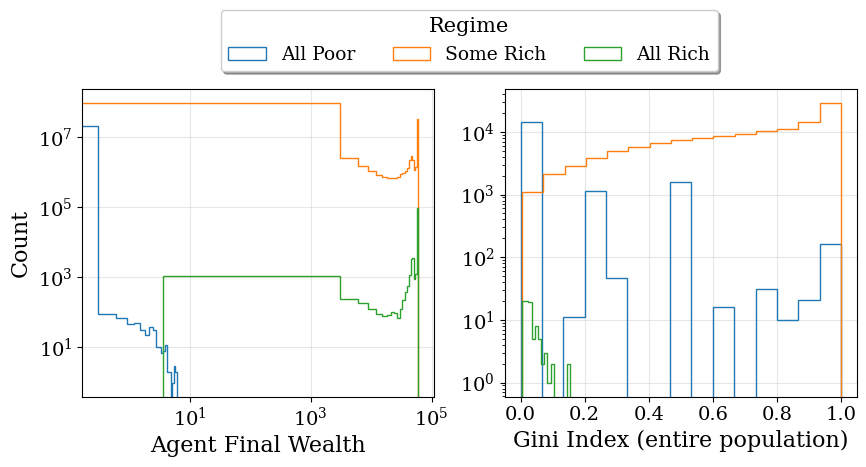

In [154]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))
regime_name = {0:"All Poor", 1:"Some Rich", 2:"All Rich"}

for r in [0,1,2]:
    data = FINAL_W[np.where(regime==r)]
    axs[0].hist(data.flatten(), histtype="step", bins=20, label=regime_name[r])
    axs[1].hist([x for x in ginis[r] if 0<=x<=1], histtype="step", bins=15, label=regime_name[r])
    
axs[0].set_yscale("log")
axs[0].set_xscale("log")
axs[0].set_ylabel("Count")
axs[0].set_xlabel("Agent Final Wealth")

axs[1].set_yscale("log")
axs[1].set_xlabel("Gini Index (entire population)")

handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.77, 1.1), ncol=3, shadow=True, title="Regime")
plt.savefig("agent_final_wealth_gini_distributions.pdf", bbox_inches="tight")
plt.show()

# Agent degree analysis

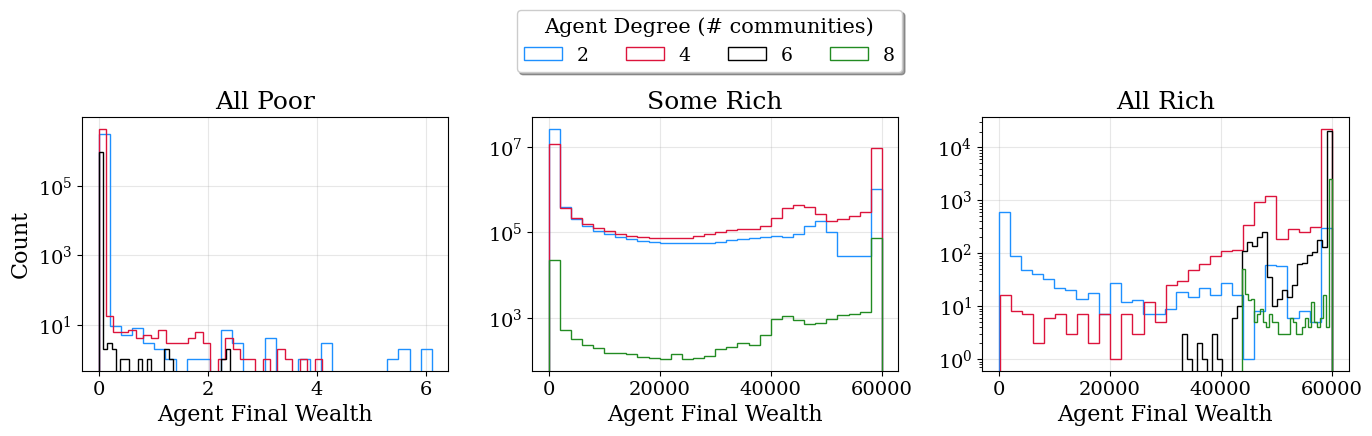

In [137]:
fig, axs = plt.subplots(1, 3, figsize=(14,4))
regime_name = {0:"All Poor", 1:"Some Rich", 2:"All Rich"}
colors = {2:"dodgerblue", 4:"crimson", 6:"black", 8:"forestgreen"}
target_degs = {0:[2,4,6], 1:[2,4,8], 2:[2,4,6,8]}

for r in range(3):
    idx = np.where(regime==r)
    alpha_vals = [X[i][4] for i in idx[1]]
    
    for d in target_degs[r]:
        vals = []
        for i,row in enumerate(FINAL_W[idx]):
            degs = agent_comm_degrees[idx[0][i]][alpha_vals[i]]
            d_idx = np.array([i for i in range(len(degs)) if degs[i]==d])
            if len(d_idx):
                vals.append(row[d_idx])
        vals = np.concatenate(vals)
        axs[r].hist(vals, histtype="step", bins=30, label=d, color=colors[d])
        axs[r].set_yscale("log")
    
    axs[r].set_title(regime_name[r])
    axs[r].set_xlabel("Agent Final Wealth")
    if r == 0:
        axs[r].set_ylabel("Count")

plt.tight_layout(rect=[0, 0, 1, 0.95])
handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.66, 1.12), ncol=4, 
           title="Agent Degree (# communities)", shadow=True)
plt.savefig("agent_degree_wealth_distributions.pdf", bbox_inches="tight")
plt.show()